In [20]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


# Set up matplotlib to show plots inline in the notebook
%matplotlib inline

# Load your dataset
csv_data = pd.read_csv('crop_recommendation.csv')  # Update path accordingly


In [21]:
# Display the first few rows of the dataset
print(csv_data.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [22]:
# Get a concise summary of the dataframe
print(csv_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [23]:
# Generate descriptive statistics
print(csv_data.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [24]:
# Check for missing values
print(csv_data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


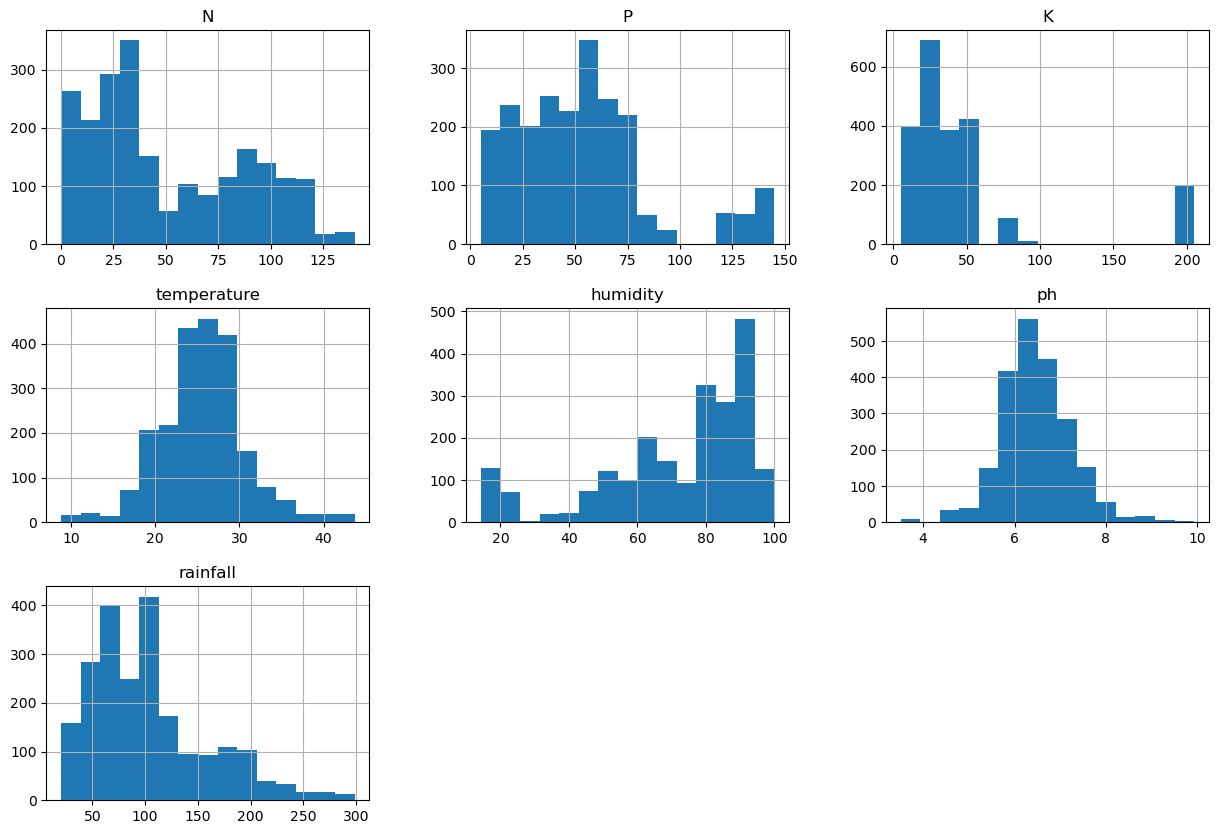

In [25]:
# Plot histograms for each parameter
csv_data.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.show()

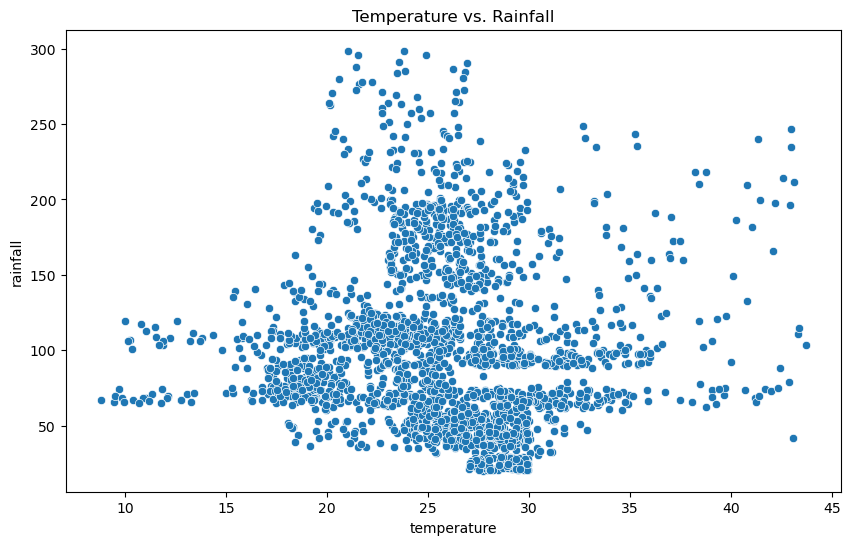

In [26]:
# Scatter plot for temperature vs. rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='rainfall', data=csv_data)
plt.title('Temperature vs. Rainfall')
plt.show()

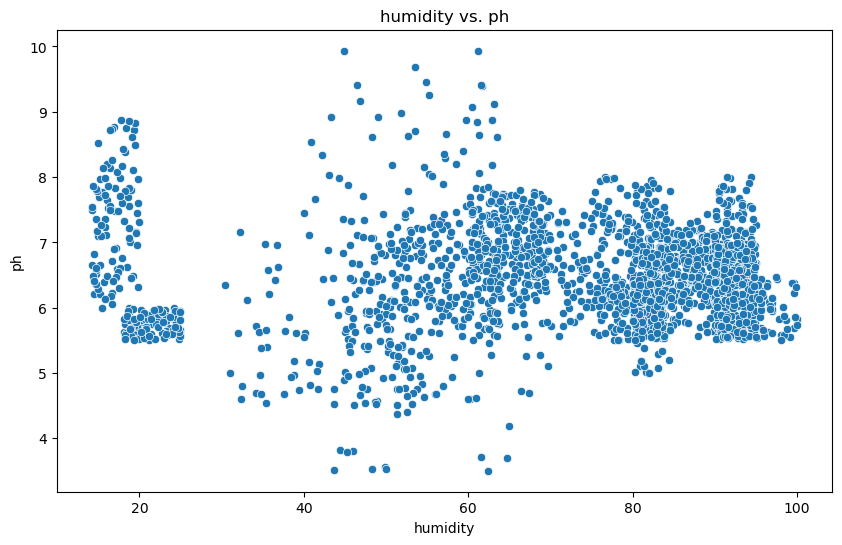

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='ph', data=csv_data)
plt.title('humidity vs. ph')
plt.show()

In [28]:
# Check data types
print(csv_data.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


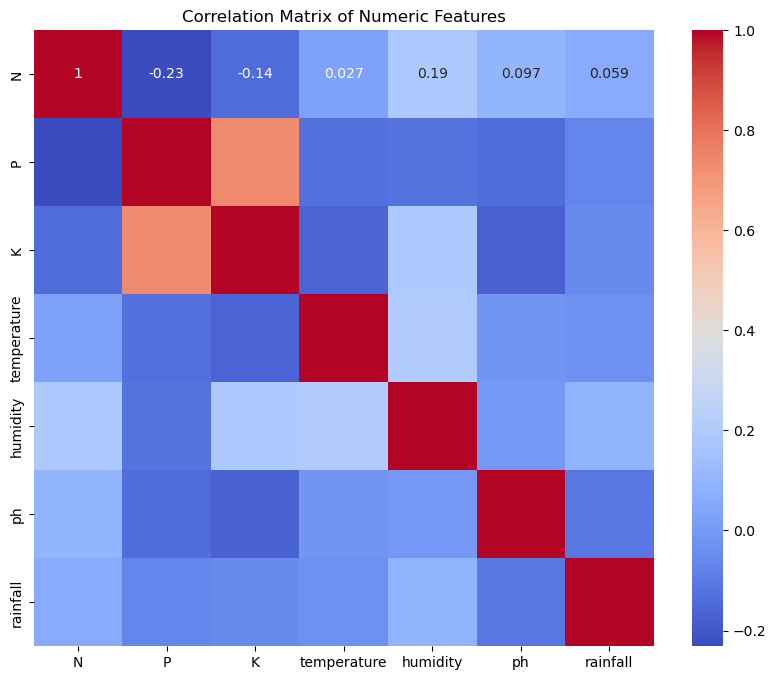

In [29]:
# 'label' is a non-numeric column, drop it for correlation analysis
numeric_data = csv_data.select_dtypes(include=[np.number])  # Selects only numeric columns

# Now calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [30]:
# As'label' is the categorical column, exclude it before scaling
numeric_columns = csv_data.select_dtypes(include=[np.number])  # this selects only numeric columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric data
scaled_numeric_data = scaler.fit_transform(numeric_columns)

In [31]:
# Convert scaled data back to DataFrame
scaled_numeric_data_df = pd.DataFrame(scaled_numeric_data, columns=numeric_columns.columns)

# If you need to reattach the crop names
scaled_numeric_data_df['label'] = csv_data['label']

In [32]:
# Example of one-hot encoding using pandas for a column named 'label'
data_encoded = pd.get_dummies(csv_data, columns=['label'])
data_encoded
# Now 'data_encoded' contains additional columns representing the presence of each label type as binary values

,N,P,K,temperature,humidity,ph,rainfall,label_apple,label_banana,label_blackgram,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,78,42,42,20.130175,81.604873,7.628473,262.717340,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,False,False,False,...,False,False,False,False,False,False,False,False,False,False


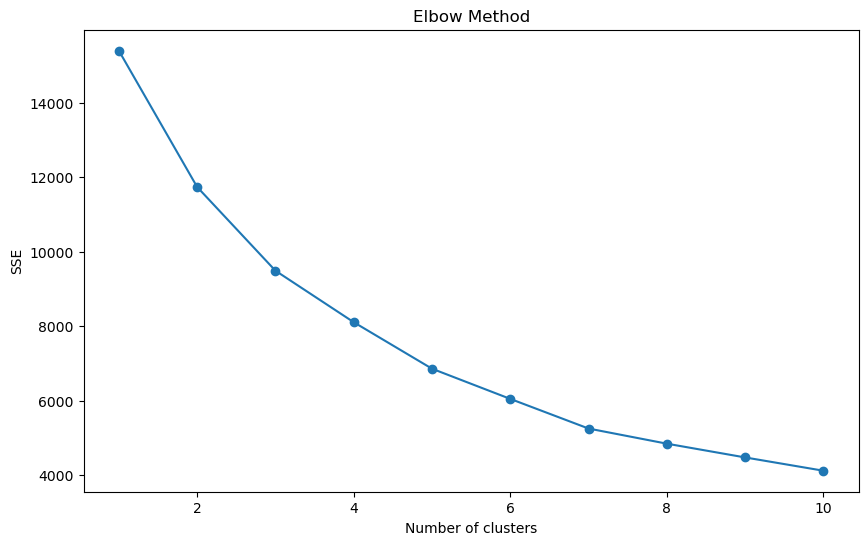

In [33]:
# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_numeric_data)
    sse.append(kmeans.inertia_)

# Plot SSE for each *k*
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [34]:
# Fit K-means using the optimal number of clusters (let's say 5 here)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_numeric_data)

# Add cluster information to the original data
csv_data['cluster'] = clusters

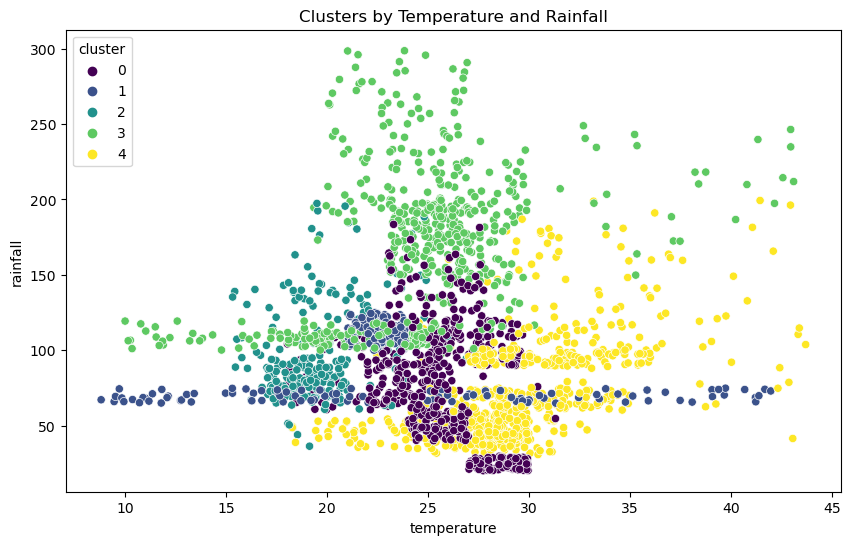

In [35]:
# Visualizing clusters (example: temperature vs. rainfall)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='rainfall', hue='cluster', data=csv_data, palette='viridis')
plt.title('Clusters by Temperature and Rainfall')
plt.show()

In [36]:
# Examining clusters by their centroids
print(kmeans.cluster_centers_)

[[ 1.32453672 -0.35944048 -0.21005724  0.00375574  0.32230675 -0.04181794
  -0.50381638]
 [-0.77384547  2.42620348  2.99884775 -0.46932134  0.70185995 -0.63544139
  -0.22440896]
 [-0.59333252  0.42739812 -0.05298537 -1.16732224 -2.15715575 -0.0667057
  -0.08736388]
 [-0.03947084 -0.622851   -0.27724227 -0.21185159  0.61442529  0.05999534
   1.17675141]
 [-0.67215679 -0.03972589 -0.49366793  0.78136951 -0.26616052  0.20961393
  -0.53382753]]


In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define which columns are numeric and which are categorical
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
categorical_cols = ['label']  

# Define preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the KMeans clustering pipeline
kmeans_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=5, random_state=0))
])

# Fit the pipeline
kmeans_pipe.fit(csv_data[numeric_cols + categorical_cols])

# Get cluster labels
csv_data['cluster'] = kmeans_pipe.named_steps['kmeans'].labels_


In [38]:
#new
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality for visualization to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(kmeans_pipe.named_steps['preprocessor'].transform(csv_data[numeric_cols + categorical_cols]))

# Add cluster labels to the dataframe
csv_data['cluster'] = kmeans_pipe.named_steps['kmeans'].labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in csv_data['cluster'].unique():
    plt.scatter(pca_result[csv_data['cluster'] == cluster, 0], 
                pca_result[csv_data['cluster'] == cluster, 1], 
                label=f'Cluster {cluster}')

plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [ ]:
grouped = csv_data.groupby('cluster')['label'].value_counts().unstack(fill_value=0)
print(grouped)

In [ ]:
# Normalize the counts to get a score that sums to 1 for comparison
grouped_norm = grouped.div(grouped.sum(axis=1), axis=0)
print(grouped_norm)

In [ ]:
characteristic_crops = grouped_norm.idxmax(axis=1)
print(characteristic_crops)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(grouped_norm, annot=True, cmap='viridis')
plt.title('Crop Distribution Across Clusters')
plt.show()

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Example function to define best crop per cluster
def define_best_crops_per_cluster(cluster_labels, crop_data):
    best_crops = {}
    for cluster in set(cluster_labels):
        cluster_crops = crop_data[csv_data['cluster'] == cluster]['label']
        best_crop = cluster_crops.value_counts().idxmax()  # This assumes the most common crop is the best
        best_crops[cluster] = best_crop
    return best_crops

# Function to recommend crops based on input conditions
def recommend_crops(input_temperature, input_rainfall, input_ph, input_humidity, input_N, input_P, input_K, scaler, kmeans, best_crops):
    input_data_scaled = scaler.transform([[input_temperature, input_rainfall, input_ph, input_humidity, input_N, input_P, input_K]])
    predicted_cluster = kmeans.predict(input_data_scaled)[0]
    best_crop = best_crops[predicted_cluster]
    
    # Get other crops in the same cluster
    other_crops = csv_data[csv_data['cluster'] == predicted_cluster]['label'].unique().tolist()
    other_crops.remove(best_crop)
    
    return predicted_cluster, best_crop, other_crops

# Usage
k = 4  # Number of clusters
csv_data = pd.read_csv('crop_recommendation.csv')
numeric_data = csv_data[['temperature', 'rainfall', 'ph', 'humidity', 'N', 'P', 'K']]
scaler = StandardScaler().fit(numeric_data)
kmeans = KMeans(n_clusters=k, random_state=0).fit(scaler.transform(numeric_data))
csv_data['cluster'] = kmeans.labels_

best_crops = define_best_crops_per_cluster(csv_data['cluster'], csv_data)

input_temperature = 15  
input_rainfall = 400 
input_ph = 6.36478
input_humidity = 99
input_N = 47
input_P = 90
input_K = 62
predicted_cluster, best_crop, other_crops = recommend_crops(input_temperature, input_rainfall, input_ph, input_humidity, input_N, input_P, input_K, scaler, kmeans, best_crops)

print(f"Predicted cluster: {predicted_cluster}")
print(f"Best crop: {best_crop}")
print(f"Other suitable crops: {other_crops}")


C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Predicted cluster: 0
Best crop: rice
Other suitable crops: ['pigeonpeas', 'pomegranate', 'orange', 'papaya', 'coconut', 'jute', 'coffee']


C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
data = pd.read_csv("crop_recommendation.csv")

# Define which columns are numeric and which are categorical
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
categorical_cols = ['label']

# Define preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the KMeans clustering pipeline
kmeans_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=5, random_state=0))
])

# Fit the pipeline
kmeans_pipe.fit(data[numeric_cols + categorical_cols])

# Get cluster labels
data['cluster'] = kmeans_pipe.named_steps['kmeans'].labels_

# Display the first few rows of the data with cluster labels
print(data.head())

# Evaluate the clustering results
cluster_counts = data.groupby(['cluster', 'label']).size().unstack(fill_value=0)
print("\nCluster counts for each label:")
print(cluster_counts)


C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    N   P   K  temperature   humidity        ph    rainfall label  cluster
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice        1
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice        1
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice        1
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice        1
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice        1

Cluster counts for each label:
label    apple  banana  blackgram  chickpea  coconut  coffee  cotton  grapes  \
cluster                                                                        
0          100       0          0         0        0       0       0     100   
1            0       0          0         0      100      46       0       0   
2            0     100          0         0        0      54     100       0   
3            0       0        100         0        0       0       0       0   
4            0       0          0     

In [4]:
# Evaluate the relevance of recommendations
# Manually evaluate the relevance of the recommended crops for a set of test data points
# This could involve comparing the recommended crops with expert knowledge or historical data

# Evaluate coverage
unique_recommendations = data['label'].unique()
total_unique_crops = len(unique_recommendations)
total_recommendations = data.groupby('cluster')['label'].nunique().sum()
coverage = total_recommendations / total_unique_crops

# Evaluate novelty
common_crops = data['label'].value_counts().index[:5]  # Assuming top 5 crops are common
novelty = 1 - len(set(common_crops).intersection(unique_recommendations)) / total_unique_crops

# Evaluate user satisfaction
# Collect feedback on the recommendations provided and calculate user satisfaction scores or feedback ratings
